# Housing : Price Prediction

## Importing Packages 

In [169]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [170]:
# To display all the columns present in the dataset
pd.set_option('display.max_columns',None)

# To display all the entries present in the dataset
pd.set_option('display.max_rows',None)

In [171]:
# Train Dataset
# Loading the Dataset
df_train=pd.read_csv("train.csv")

# print top 5 records
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

- #### Our Task is to predict the price of House.
This is a Regression problem.

In [172]:
# Test Dataset
# Loading the Dataset
df_test=pd.read_csv("test.csv")

# print top 5 records
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [173]:
# Train Dataset
# print shape of the dataset with rows and columns
df_train.shape

(1168, 81)

- We have 1168 entries in our training dataset and 81 columns including our target variable: SalePrice.

In [174]:
# Test Dataset
# print shape of the dataset with rows and columns
df_test.shape

(292, 80)

- We have 292 rows and 80 columns in our Test dataset.

In [175]:
# Train Dataset
# Getting some information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- We have total 81 columns out of which 43 have object values, 35 have integer values and 3 have float values. Our target variable "SalePrice" is of integer type.
- Also many columns have null values.

In [176]:
# Test Dataset
# Getting some information
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

- We have total 80 columns out of which 42 have object values, 34 have integer values and 4 have float values. 
- Here also many columns have missing values.

In [177]:
# checking the count of unique values for each column in Train dataset
df_train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

- Here we observe that "Id" clumns has 1168 unique values which is same as the count of entries. Id cannot make any contribution in the prediction of House Price, hence, we can remove Id column.

In [178]:
# checking the count of unique values for each column in Test dataset
df_test.nunique()

Id               292
MSSubClass        15
MSZoning           4
LotFrontage       65
LotArea          249
Street             2
Alley              2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      24
Condition1         8
Condition2         2
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        7
YearBuilt         84
YearRemodAdd      57
RoofStyle          5
RoofMatl           3
Exterior1st       12
Exterior2nd       14
MasVnrType         4
MasVnrArea       104
ExterQual          4
ExterCond          4
Foundation         6
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       184
BsmtFinType2       6
BsmtFinSF2        32
BsmtUnfSF        231
TotalBsmtSF      224
Heating            4
HeatingQC          4
CentralAir         2
Electrical         4
1stFlrSF         238
2ndFlrSF         113
LowQualFinSF       4
GrLivArea        246
BsmtFullBath 

- Here we see that for some categorical features the number of categories in the Training dataset is not matching with the Test dataset. For example, MSZoning, Utilities, SaleType, SaleCondition, etc. 
- So while encoding the categorical variables we need to take care of this. 

In [179]:
# checking the count of missing values for each column
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

- In our Train dataset, many columns has missing values, some are categorical and some are numerical. We can fill categorical missing values using Mode and numerical missing values with Mean or Median depending on their distribution.

In [180]:
# Making the list of features having Missing values
features_with_null_train=[features for features in df_train.columns if df_train[features].isnull().sum()>1]

# Printing the feature name and its missing value count
for feature in features_with_null_train:
    print(feature,":",df_train[feature].isnull().sum())

LotFrontage : 214
Alley : 1091
MasVnrType : 7
MasVnrArea : 7
BsmtQual : 30
BsmtCond : 30
BsmtExposure : 31
BsmtFinType1 : 30
BsmtFinType2 : 31
FireplaceQu : 551
GarageType : 64
GarageYrBlt : 64
GarageFinish : 64
GarageQual : 64
GarageCond : 64
PoolQC : 1161
Fence : 931
MiscFeature : 1124


<AxesSubplot:>

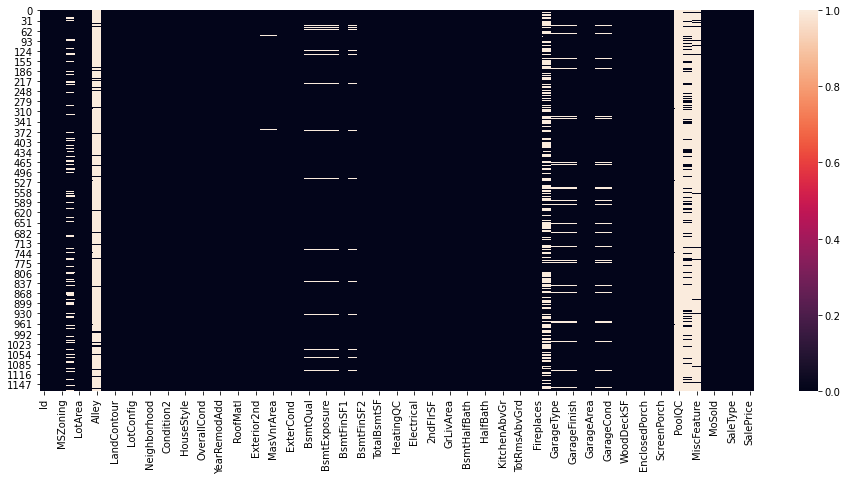

In [181]:
# Train Dataset
#plotting heatmap to view the missing values
plt.figure(figsize=(16,7))
sns.heatmap(df_train.isnull())

- The White stripes in the heatmap shows the missing values for that column.

In [182]:
# Test Dataset
# checking the count of missing values for each column 
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

- In our Test dataset too we have many columns having missing values which are categorical and numerical both. 
- For the test dataset, we have observed that PoolQC is having all the entries as NaN and hence its datatype is Float. However, its actually a categorical feature. So we need to delete this feature as we have no information to fill the null values. 

In [183]:
# Drooping PoolQC column
df_test.drop("PoolQC",axis=1,inplace=True)

In [184]:
# Making the list of features having Missing values
features_with_null_test=[features for features in df_test.columns if df_test[features].isnull().sum()>=1]

# Printing the feature name and its missing value count
for feature in features_with_null_test:
    print(feature,":",df_test[feature].isnull().sum())

LotFrontage : 45
Alley : 278
MasVnrType : 1
MasVnrArea : 1
BsmtQual : 7
BsmtCond : 7
BsmtExposure : 7
BsmtFinType1 : 7
BsmtFinType2 : 7
Electrical : 1
FireplaceQu : 139
GarageType : 17
GarageYrBlt : 17
GarageFinish : 17
GarageQual : 17
GarageCond : 17
Fence : 248
MiscFeature : 282


<AxesSubplot:>

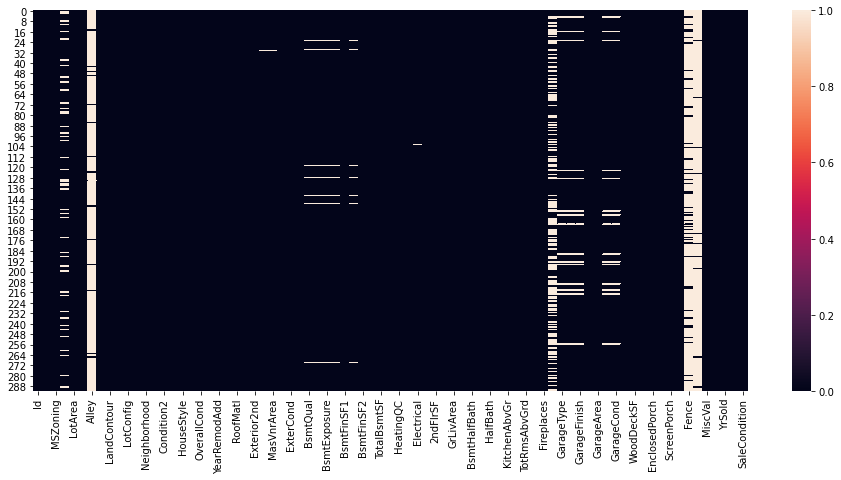

In [185]:
# Test Dataset
#plotting heatmap to view the missing values
plt.figure(figsize=(16,7))
sns.heatmap(df_test.isnull())

In [186]:
# statistical information
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

#### Statistical Observations:
- Here also we see that there are missing values in our dataset, as the count for all the columns is not 1168.
- Majority of the numerical columns are categorical having ratings.
- Mean and median are same for LotFrontage, TotalBsmtSF, 1stFlrSF, GarageArea, that means they have normal distribution.
- We see a large difference between 75th percentile and max values for LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtUnfSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, this means that there could be extreme outliers present. 

In [187]:
df_test.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count   292.000000   292.000000    292.000000   291.000000   292.000000   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521   
std       1.063267    30.447016     20.105792   175.030021   429.559675   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   292.000000   292.000000   292.000000   292.000000   292.000000   
mean     46.157534   557.315068  1042.767123  1133.691781   339.657534   
std     152.467119   411.043768   424.561153   366.941919   424.278825   
min       0.000000     0.000000     0.000000   372.000000     0.000000   
25%       0.000000   255.000000   771.750000   858.000000     0.000000   
50%       0.000000   487.000000   971.000000  1047.500000     0.000000   
75%       0.000000   780.000000  1322.000000  1370.500000   717.000000   
max    1085.000000  1935.000000  3094.000000  2402.000000  1589.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    292.000000   292.000000    292.000000    292.000000  292.000000   
mean       3.702055  1477.051370      0.424658      0.065068    1.575342   
std       38.219527   514.199429      0.508831      0.247070    0.547856   
min        0.000000   520.000000      0.000000      0.000000    0.000000   
25%        0.000000  1061.500000      0.000000      0.000000    1.000000   
50%        0.000000  1440.000000      0.000000      0.000000    2.000000   
75%        0.000000  1720.250000      1.000000      0.000000    2.000000   
max      479.000000  3447.000000      2.000000      1.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  292.000000    292.000000     292.00000    292.000000  292.000000   
mean     0.359589      2.794521       1.05137      6.417808    0.595890   
std      0.494795      0.807336       0.23616      1.728105    0.621259   
min      0.000000      0.000000       1.00000      3.000000    0.000000   
25%      0.000000      2.000000       1.00000      5.000000    0.000000   
50%      0.000000      3.000000       1.00000      6.000000    1.000000   
75%      1.000000      3.000000       1.00000      7.000000    1.000000   
max      2.000000      6.000000       3.00000     12.000000    2.000000   

       GarageYrBlt  GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  \
count   275.000000  292.000000   292.000000  292.000000   292.000000   
mean   1979.760000    1.729452   457.458904   86.397260    47.061644   
std      23.868875    0.754430   210.785591  121.898836    65.865449   
min    1916.000000    0.000000     0.000000    0.000000     0.000000   
25%    1964.000000    1.000000   300.000000    0.000000     0.000000   
50%    1979.000000    2.000000   467.500000    0.000000    28.500000   
75%    2003.000000    2.000000   569.750000  149.250000    66.000000   
max    2010.000000    4.000000  1052.000000  728.000000   41

#### Statistical Observations:
- Here we also observe the similar things as we did for Training data.
- There are missing values and many of the numerical columns have normal distribution.

## Exploratory Data Analysis

### Numerical Variables

In [188]:
# List of numerical features
numerical_features=[feature for feature in df_train.columns if df_train[feature].dtypes !="O"]

print("Number of numerical features:",len(numerical_features))

# viewing the numerical variables
df_train[numerical_features].head()

Number of numerical features: 38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  127         120          NaN     4928            6            5       1976   
1  889          20         95.0    15865            8            6       1970   
2  793          60         92.0     9920            7            5       1996   
3  110          20        105.0    11751            6            6       1977   
4  422          20          NaN    16635            6            7       1977   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          1976         0.0         120           0        958         1078   
1          1970         0.0         351         823       1043         2217   
2          1997         0.0         862           0        255         1117   
3          1977       480.0         705           0       1139         1844   
4          2000       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       1977.0           2         440           0          205   
1       1970.0           2         621          81          207   
2       1997.0           2         455         180          130   
3       1977.0           2         546           0          122   
4       1977.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  
0     128000  
1     268000  
2     269790  
3     190000  
4     215000

#### Datetime variables:
In our dataset, we have 4 year variables. We can extract information from these datetime variables like no. of years by getting the difference between the year the house was built and the year the house was sold.

In [189]:
# List of variables that contain  year information
year_feature=[feature for feature in numerical_features if "Yr" in feature or "Year" in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs Year Sold')

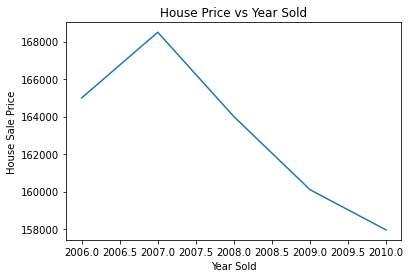

In [190]:
# Let's analyze the Datetime variables
# We will check if there is any relationship between the year the house was sold and the Sale Price

df_train.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("House Sale Price")
plt.title("House Price vs Year Sold")

- Here we see that the House Price is decreasing as the years are passing by. This is something weird because usually as the years passes by the House Price also should increase. But here it is something different and this cannot be true. So we need to find out more information.

In [191]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

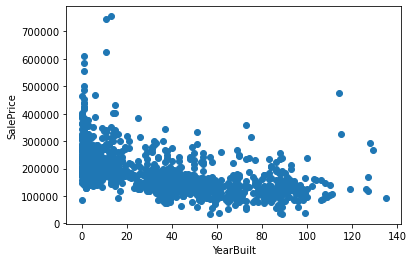

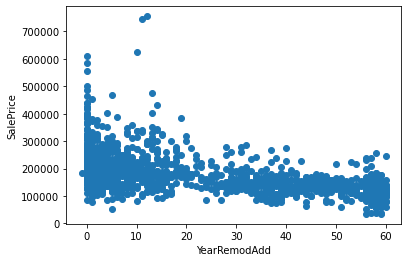

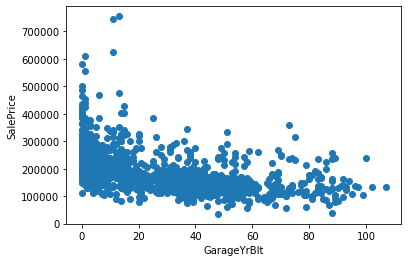

In [192]:
# Let's compare the difference between all year features with SalePrice

for feature in year_feature:
    if feature !="YrSold":
        data=df_train.copy()
        # We will capture the difference between the year variable and year the house was sold
        data[feature]=data["YrSold"]-data[feature]
        
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

#### Observations:
- YearBuilt : The older the house is, the less is its price. The prices are high if the house is 0 to 10 years old.
- YearRemodAdd : If the House is recently been modified like before 0 to 10 years then house prices are high. However, if its been many year for the modification then the prices are lesser.
- GarageYrBlt : Its the same case with GarageYrBlt variable. The newer the Garage the higher are the house prices.

In [193]:
# Numerical variables are usually of two types:
# 1. Continuous variable and 2. Discrete variable
# considering 25 as the threshold value for each feature's unique values
discrete_feature=[feature for feature in numerical_features if len(df_train[feature].unique())<25 and feature not in year_feature+["Id"]]

print("Discrete Variables Count:",len(discrete_feature))
discrete_feature

Discrete Variables Count: 17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

- These are all our discrete variables in our dataset.

In [194]:
# checking the discrete features
df_train[discrete_feature].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0         120            6            5             0             0   
1          20            8            6             0             1   
2          60            7            5             0             1   
3          20            6            6             0             0   
4          20            6            7             0             0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         0             2             1             5   
1             0         2         0             4             1             8   
2             0         2         1             3             1             8   
3             0         2         0             3             1             7   
4             1         2         0             3             1             8   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           1           2          0         0        0       2  
1           1           2          0         0        0      10  
2           1           2          0         0        0       6  
3           1           2          0         0        0       1  
4           1           2          0         0        0       6

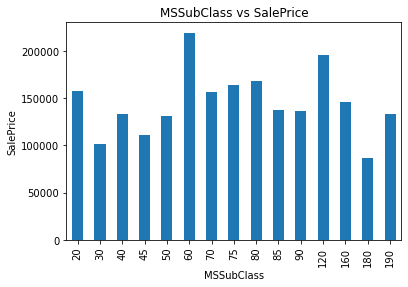

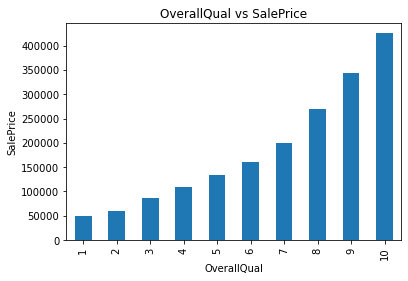

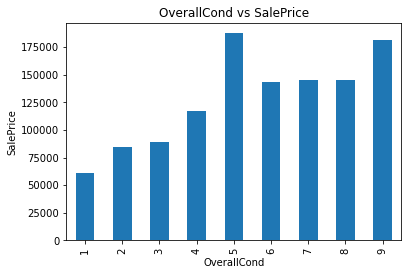

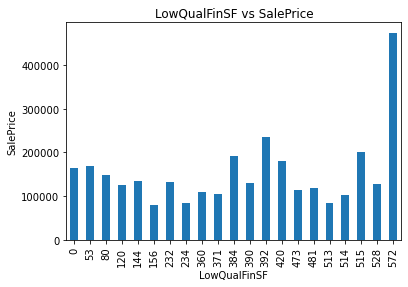

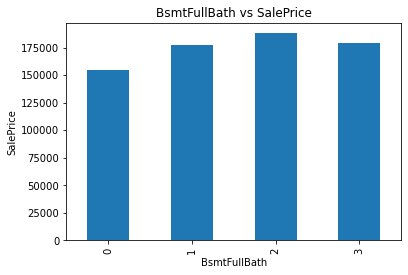

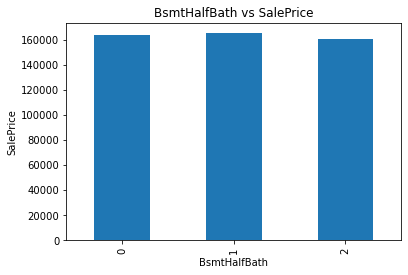

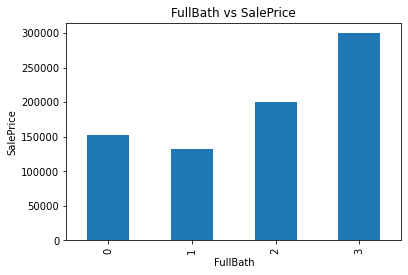

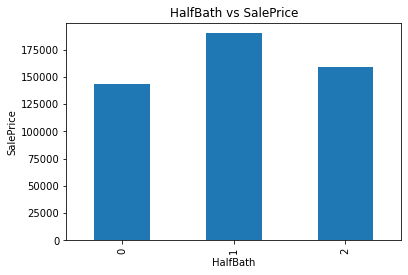

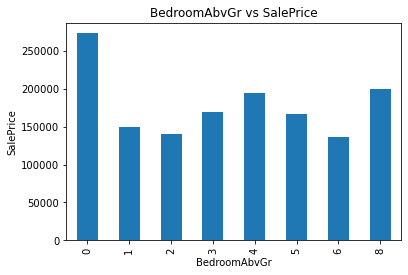

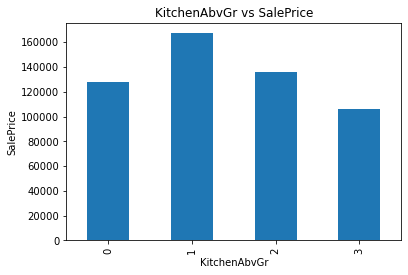

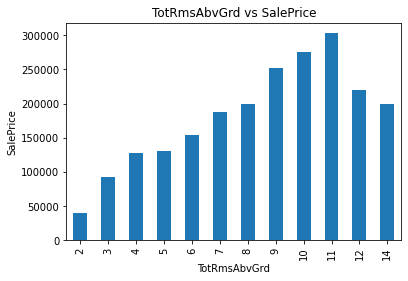

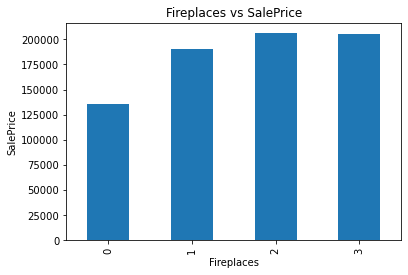

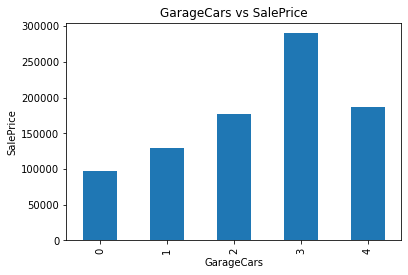

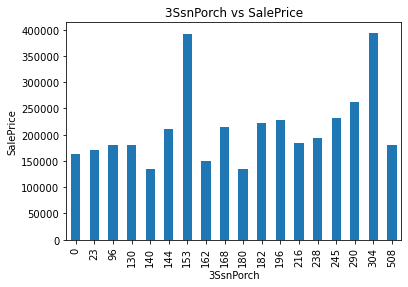

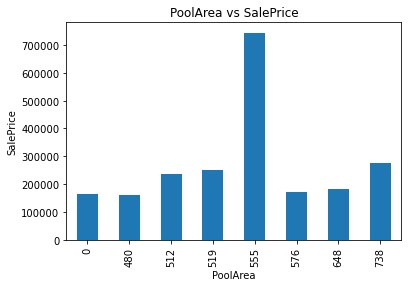

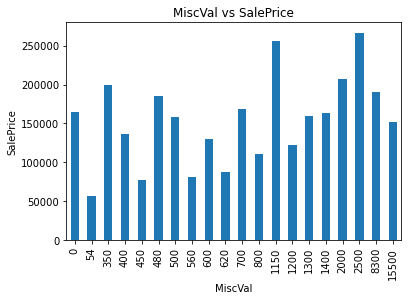

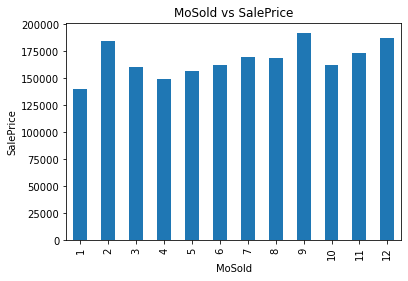

In [195]:
# Let's find the relationship between Discrete Variables and the SalePrice

for feature in discrete_feature:
    data=df_train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature+" vs SalePrice")
    plt.show()

#### Observations:
- MSSubClass : Sale price is highest for the 2-story 1946 & Newer dwelling and 1-STORY PUD (Planned Unit Development) - 1946 & NEWER.It is least for 1-STORY 1945 & OLDER and PUD - MULTILEVEL - INCL SPLIT LEV/FOYER dwellings.
- OverallQual : There is an exponential rise in the House prices as the ratings for the overall Quality of the house increases. This rating is for the material and finish of the house.
- OverallCond : There is a increasing trend in the House Prices as the rating for the overall condition of house increases. 
- LowQualFinSF : Here we do not observe any relationship between Sale Price and this feature.
- BsmtFullBath : We see a slight increase in price as the number of basement full bathrooms increases. Prices are highest for the houses having 2 basement full bathrooms.
- BsmtHalfBath : There is no relationship observed between SalePrice and the variable BsmtHalfBath. 
- FullBath : There is an increasing trend as the number of full bathrooms above grade increases. 
- HalfBath : We cannot conclude any relationship between SalePrice and the Half Baths above grade.
- BedroomAbvGr : We cannot see any relationship between BedroomAbvGr and the SalePrice. Prices are high for the houses having 0 bedrooms above grade.
- KitchenAbvGr : We see that SalePrice decreases as the number of Kitchen above grade increases.
- TotRmsAbvGrd : SalePrice increases exponentially as the number of Total rooms above grade increases. 
- Fireplaces : There is a slight increase in SalePrice with the increase in the number of Fire Places.
- GarageCars : SalePrice increases exponentially as the size of garage in car capacity increases. However the prices are lower for the garages with 4 car capacity.
- 3SsnPorch : There is a slight increase in the SalePrice as the size of three season porch area increases.
- PoolArea : There is no relationship visible in SalePrice and PoolArea. However, prices are high where Pool Areas are of 555 sq.ft.
- MiscVal : There is no relationship visible between SalePrice and Value of miscellaneous feature.
- MoSold : Prices are high when the houses are sold in the month February, September and December.

#### Continuous Variables

In [196]:
# Making a list of Continuous Features
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+["Id"]]

# Printing the count of Continuous Features
print("Continuous Variable Count:",len(continuous_feature))

Continuous Variable Count: 16


In [197]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

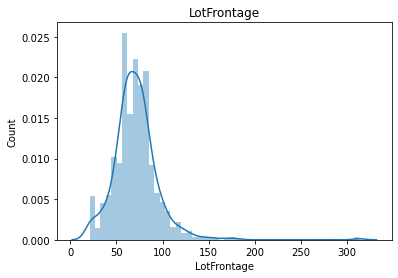

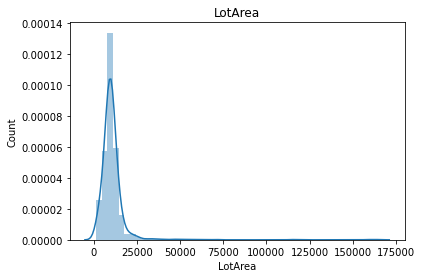

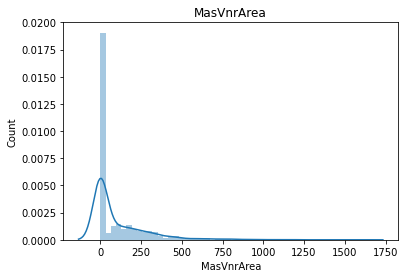

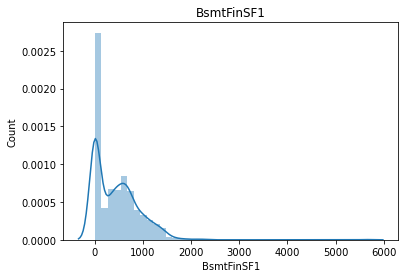

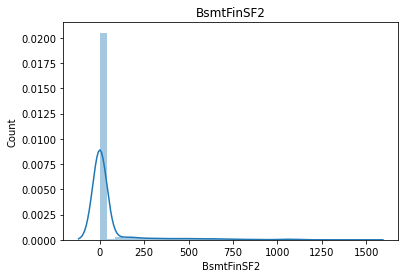

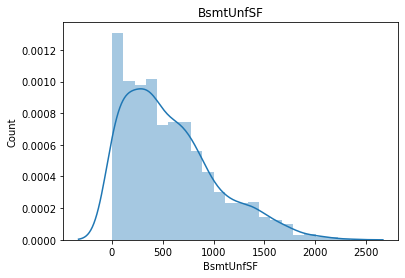

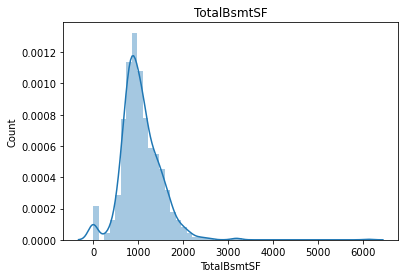

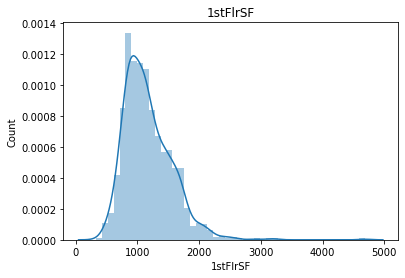

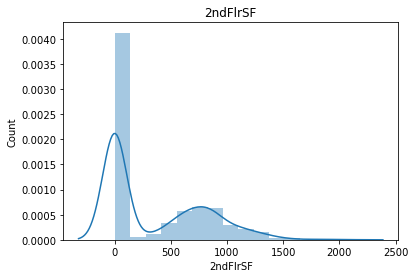

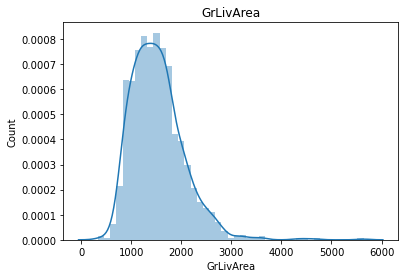

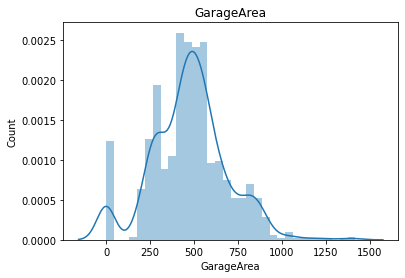

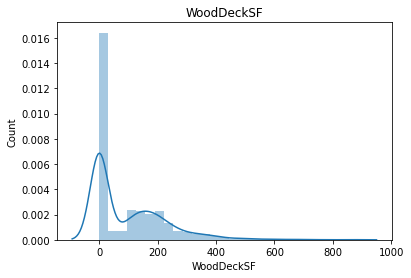

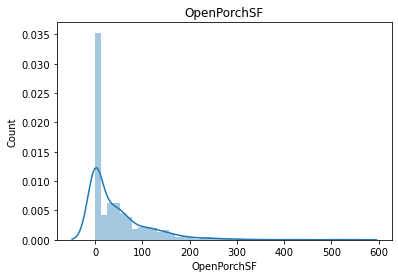

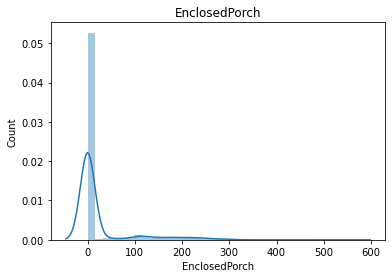

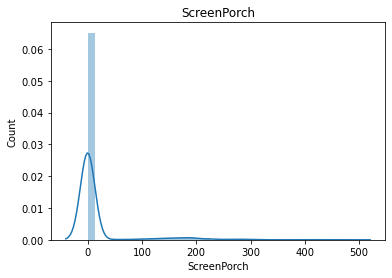

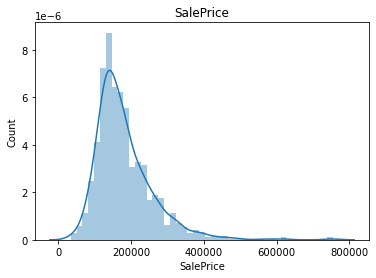

In [198]:
# Let's analyze the continuous variables by plotting distribution graph to understand the distribution
for feature in continuous_feature:
    data=df_train.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Observations:
- Here we see that some of the features has Gaussian Distribution and some of the features are not normally distributed. 
- Very few features have skewed data and we need to perform some transformation in order to remove this skewness. This will help in our linear model prediction.

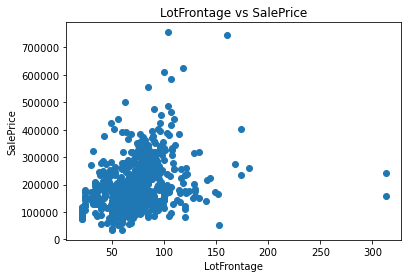

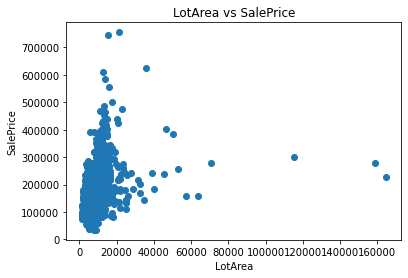

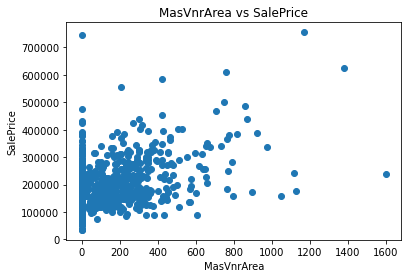

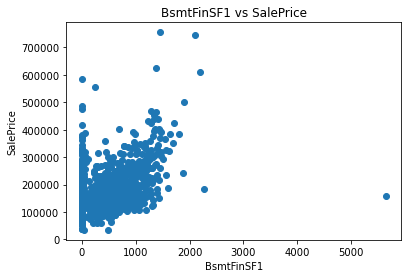

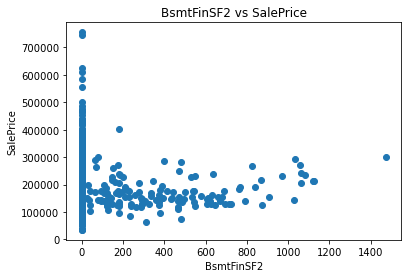

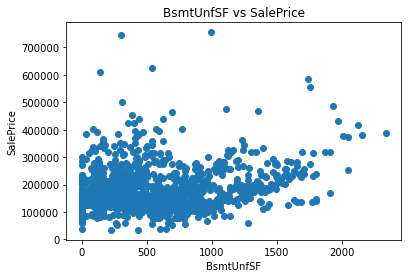

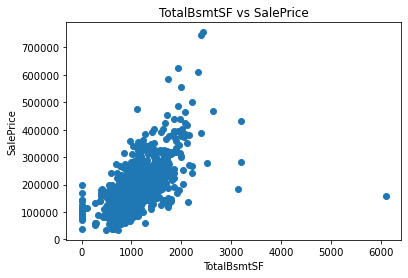

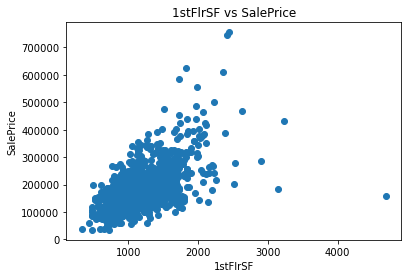

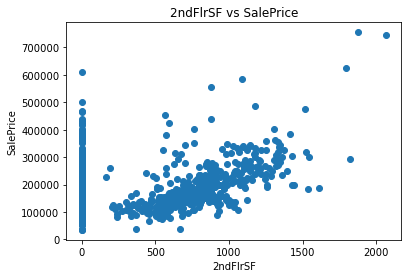

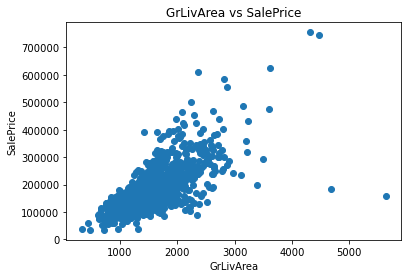

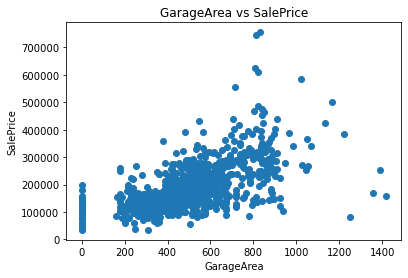

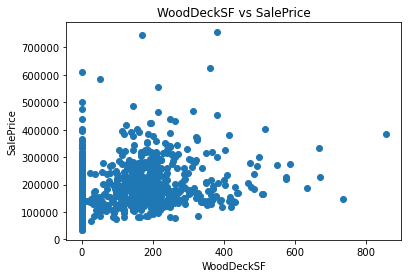

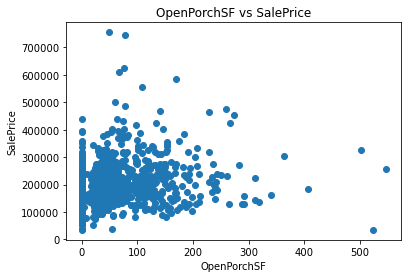

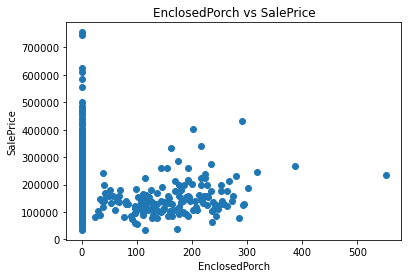

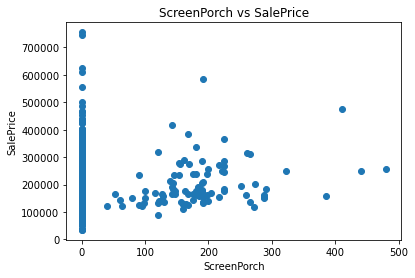

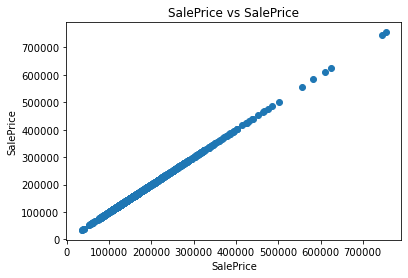

In [199]:
# Let's analyze the relationship between our Continuous Variables and the SalePrice

for feature in continuous_feature:
    data=df_train.copy()
    plt.scatter(data[feature],data["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature+" vs SalePrice")
    plt.show()

#### Observations:
- LotFrontage : There is a positive relationship between LotFrontage and SalePrice. As the linear square feet of street connected to property increases, we see an increase in SalePrice.
- LotArea : We observe a slight positive relationship between LotArea and SalePrice. 
- MasVnrArea : As the Masonry veneer area increases there is an increase in SalePrice.
- BsmtFinSF1 : As the Type 1 finished square feet area increases there is an increase in the SalePrice.
- BsmtFinSF2 : There is no relationship observed between BsmtFinSF2 and SalePrice.
- BsmtUnfSF : There is no relationship observed between BsmtUnfSF and SalePrice.
- TotalBsmtSF : Higher the Total Basement Area, higher is the SalePrice.
- 1stFlrSF : More the First Floor square feet area, more is the SalePrice.
- 2ndFlrSF : There is a positive relationship between 2ndFlrSF and SalePrice.
- GrLivArea : There is a exponential increase in SalePrice as there is an increase in the above ground living area.
- GarageArea : The SalePrices are high for the houses with more Garage Area.
- WoodDeckSF : There is a slight positive relationship between WoodDeckSF variable and SalePrice.
- OpenPorchSF : There is a slight positive relationship between OpenPorchSF variable and SalePrice.
- EnclosedPorch : There is no relationship observed between EnclosedPorch and SalePrice.
- ScreenPorch : There is no relationship observed between ScreenPorch and SalePrice.

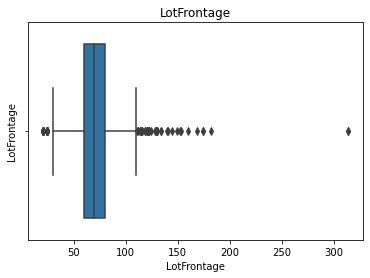

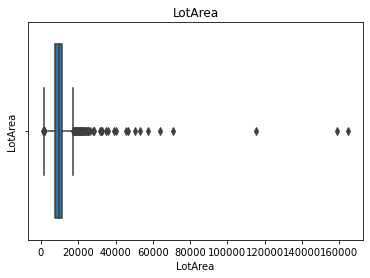

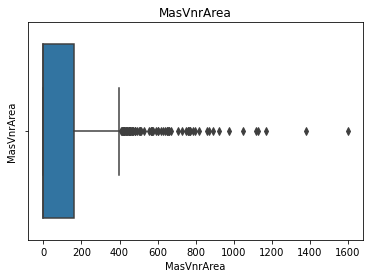

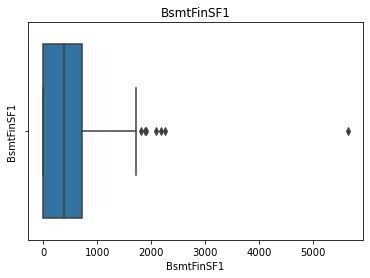

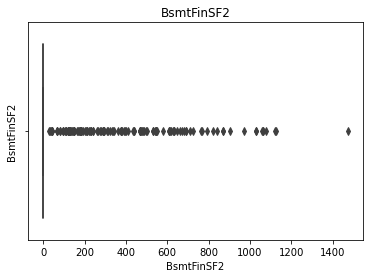

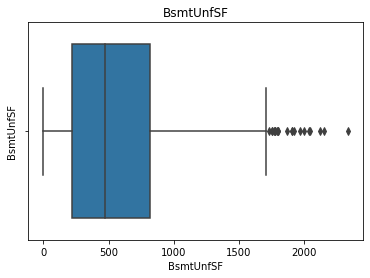

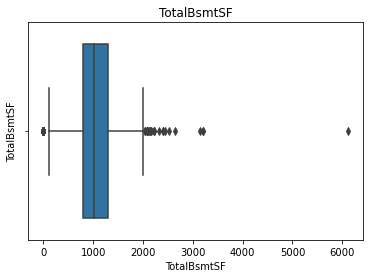

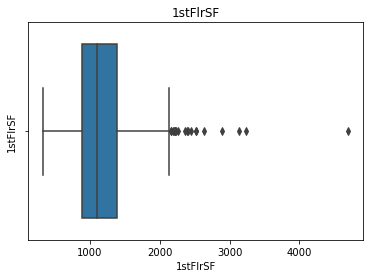

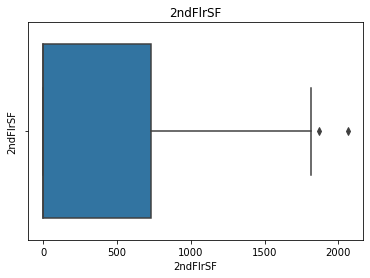

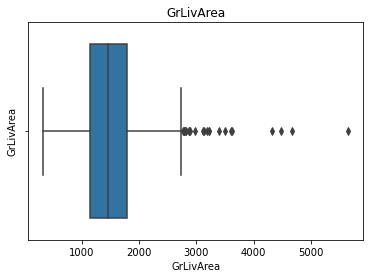

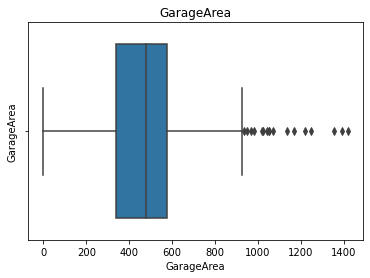

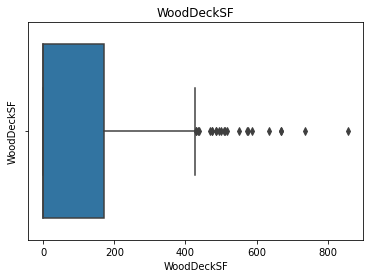

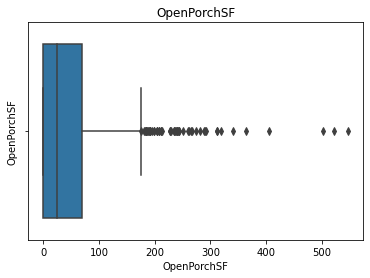

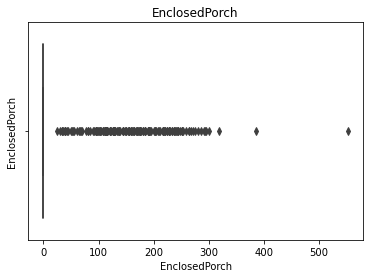

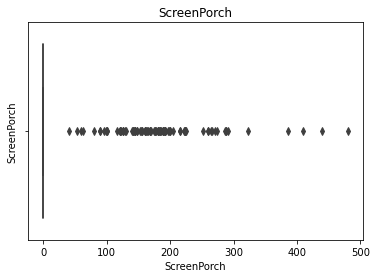

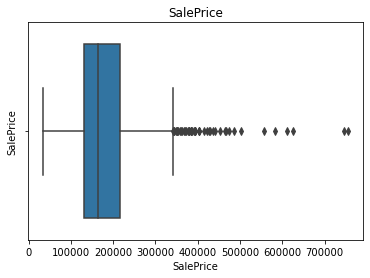

In [200]:
# Plotting boxplots to check Outliers for continuous variables
for feature in continuous_feature:
    data=df_train.copy()
    sns.boxplot(data[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

#### Observations:
- Here we see that all the continuous variables are having outliers including our dependent feature SalePrice.
- In order to improve the model performance we need to remove the outliers.

### Categorical Variables

In [201]:
# Making a list of Categorical features
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtypes=="O"]

# Printing the count of Categorical features
print("Categorical Variables Count:",len(categorical_features))
categorical_features

Categorical Variables Count: 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [202]:
df_train[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      NPkVill       Norm       Norm   TwnhsE     1Story     Gable  CompShg   
1        NAmes       Norm       Norm     1Fam     1Story      Flat  Tar&Grv   
2      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
3       NWAmes       Norm       Norm     1Fam     1Story       Hip  CompShg   
4       NWAmes       Norm       Norm     1Fam     1Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     Plywood     Plywood       None        TA        TA     CBlock       Gd   
1     Wd Sdng     Wd Sdng       None        Gd        Gd      PConc       TA   
2     MetalSd     MetalSd       None        Gd        TA      PConc       Gd   
3     Plywood     Plywood    BrkFace        TA        TA     CBlock       Gd   
4     CemntBd     CmentBd      Stone        Gd        TA     CBlock       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          ALQ          Unf    GasA        TA   
1       Gd           Gd          ALQ          Rec    GasA        Ex   
2       TA           Av          GLQ          Unf    GasA        Ex   
3       TA           No          BLQ          Unf    GasA        Ex   
4       TA           No          ALQ          Unf    GasA        Gd   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ          TA     Attchd   
1          Y      SBrkr          Gd        Typ          TA     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          TA        Typ          TA     Attchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN    NaN         NaN   
1          Unf         TA         TA          Y    NaN    NaN         NaN   
2          Unf         TA         TA          Y    NaN    NaN         NaN   
3          RFn         TA         TA          Y    NaN  MnPrv         NaN   
4          Fin         TA         TA          Y    NaN    NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3      COD        Normal  
4       WD        Normal

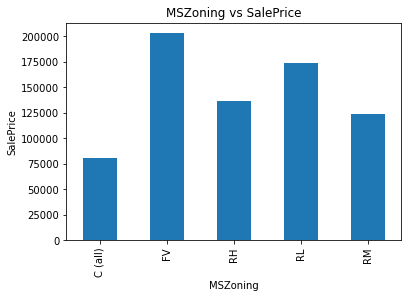

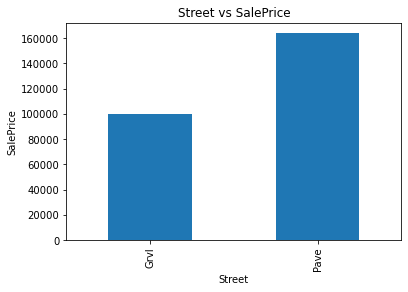

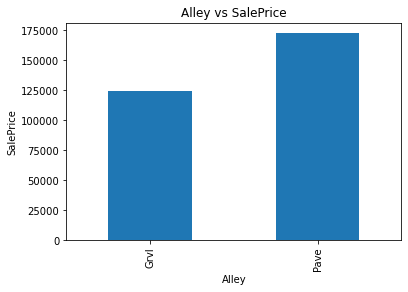

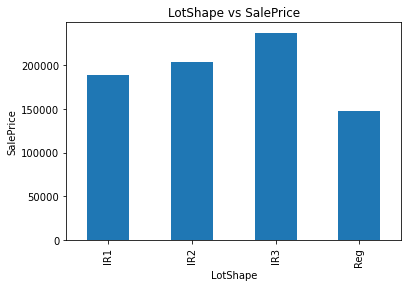

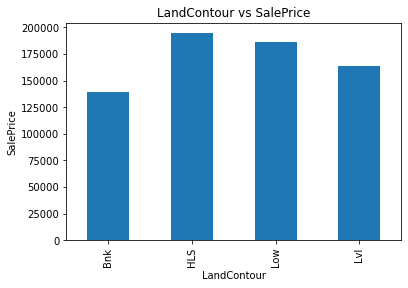

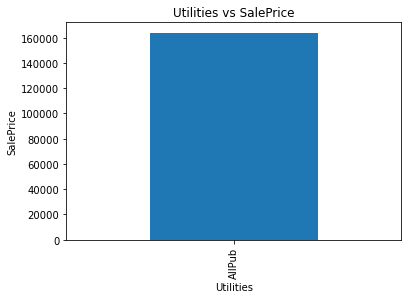

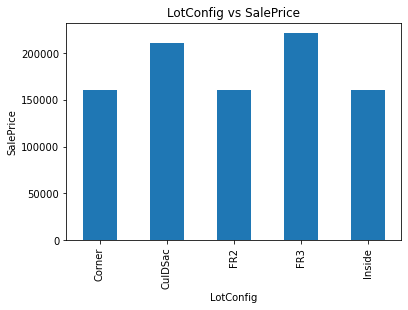

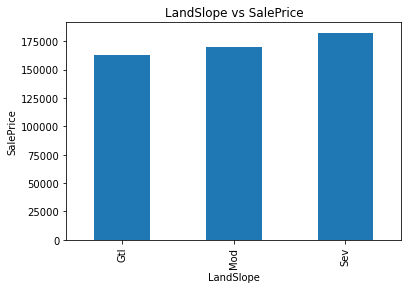

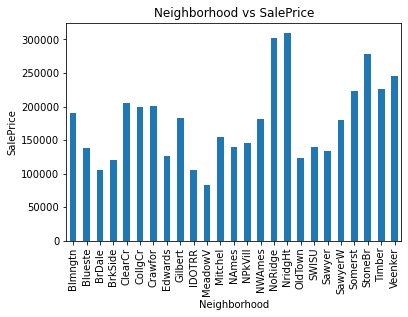

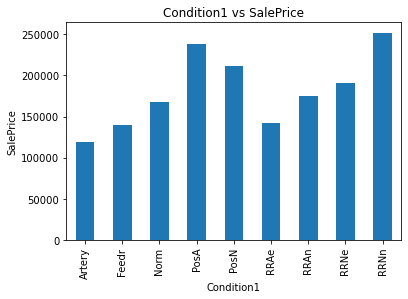

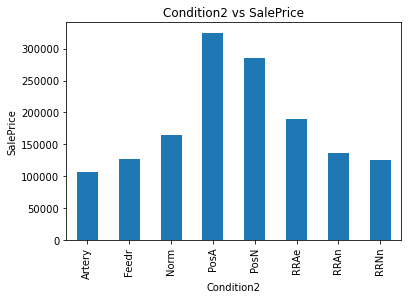

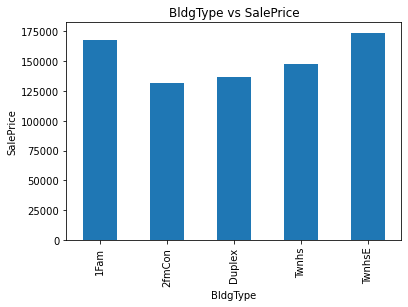

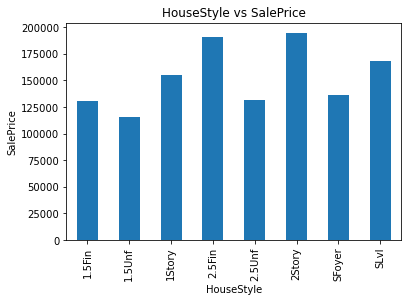

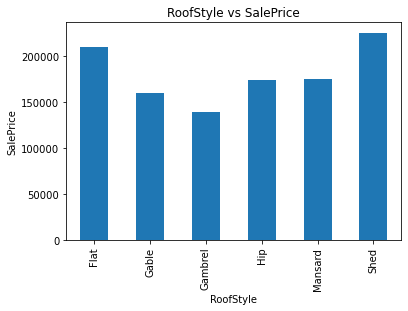

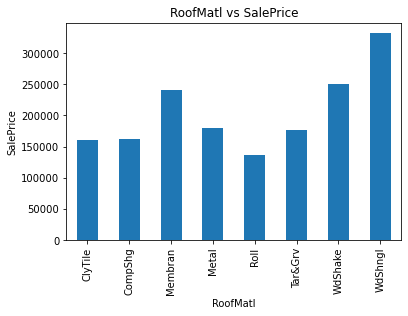

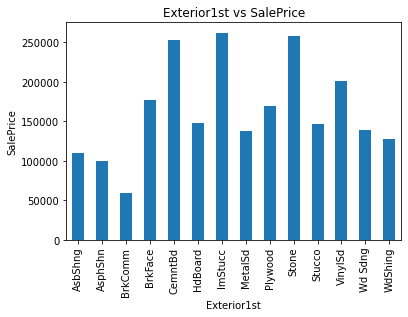

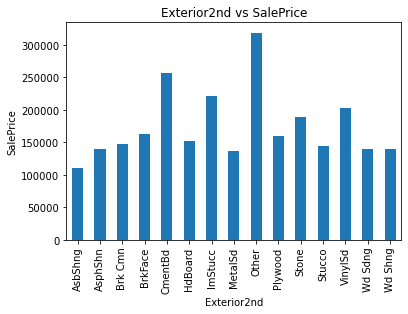

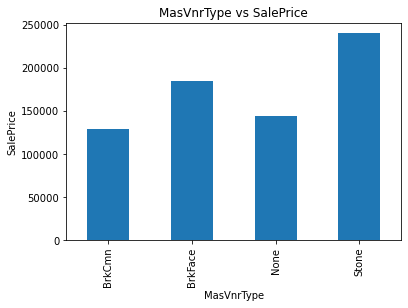

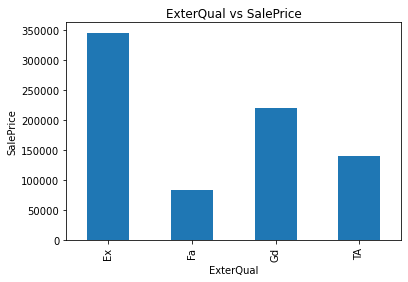

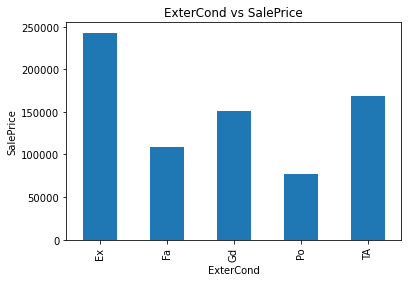

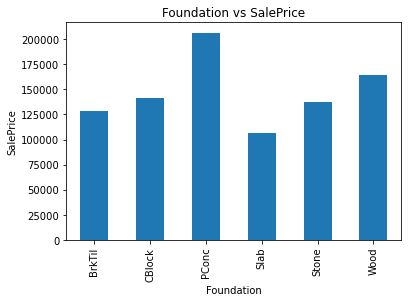

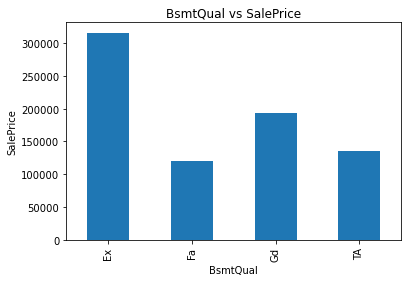

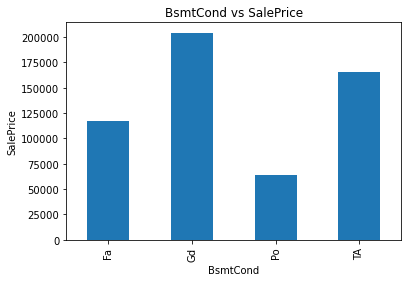

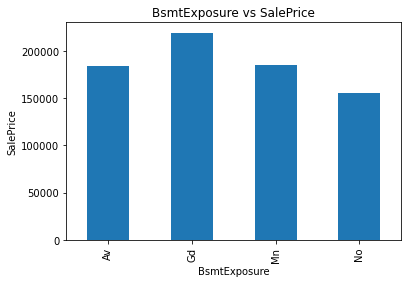

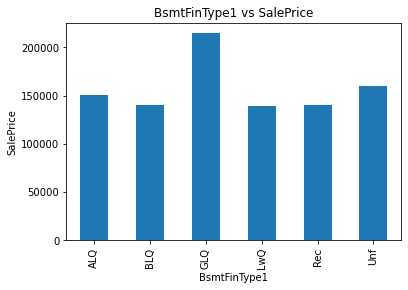

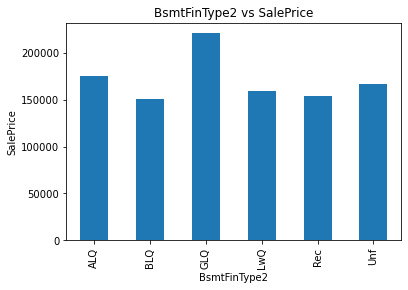

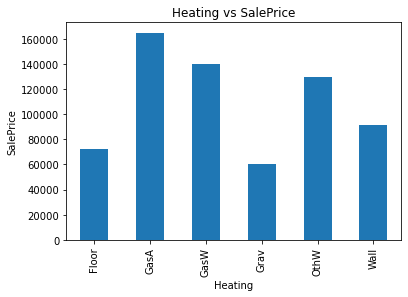

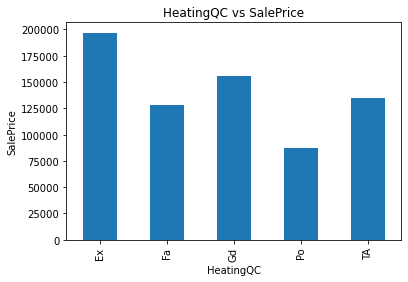

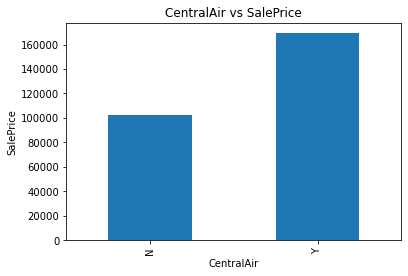

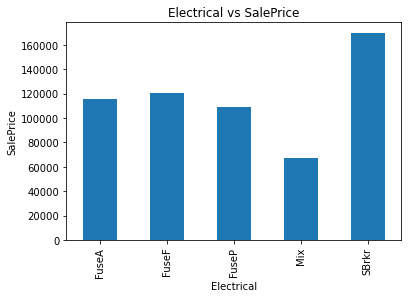

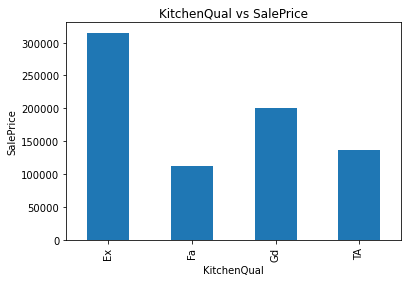

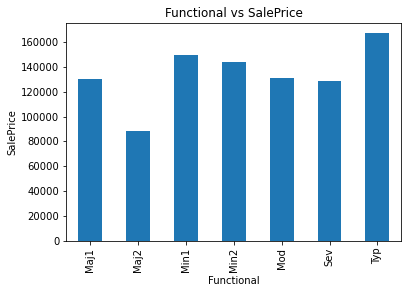

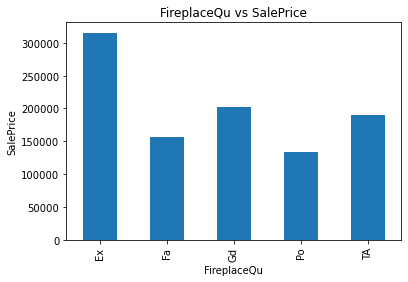

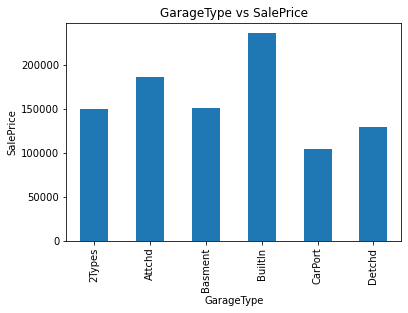

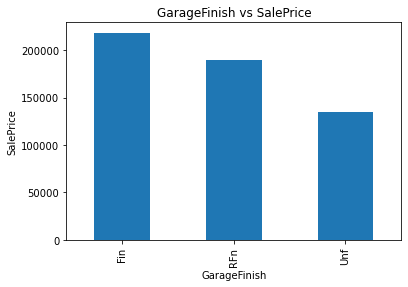

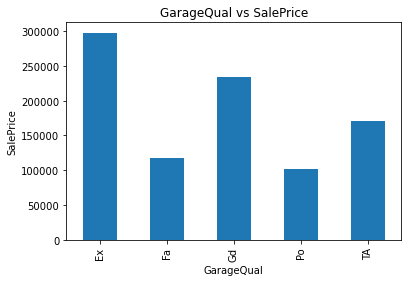

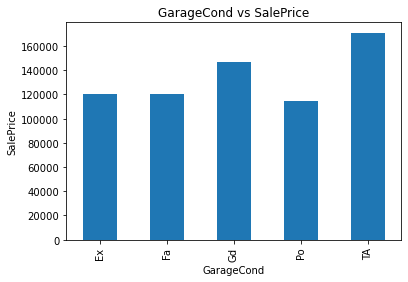

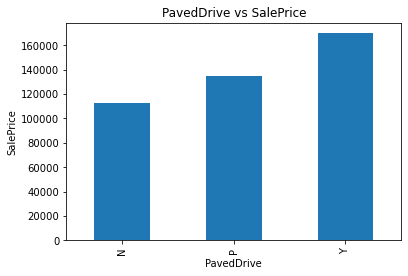

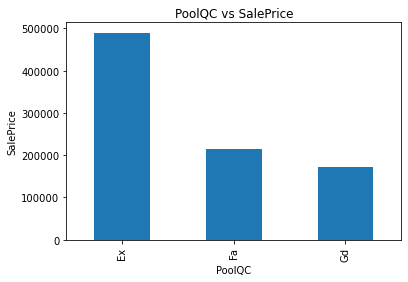

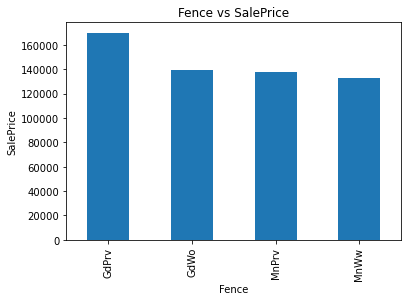

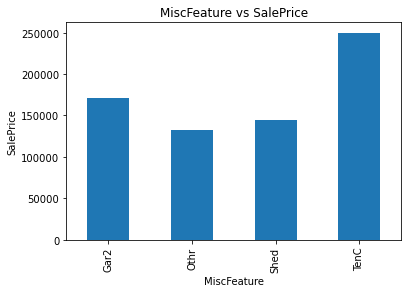

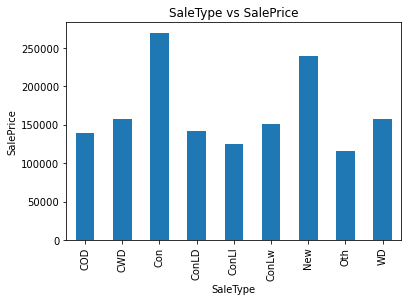

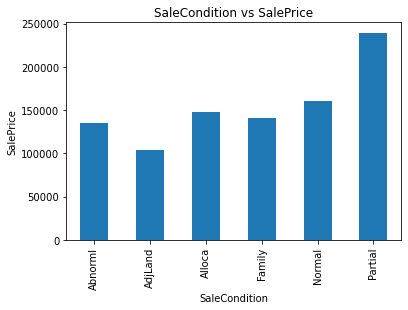

In [203]:
# Let's find out the relationship between all categorical variables and the target variable SalePrice

for feature in categorical_features:
    data=df_train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature+" vs SalePrice")
    plt.show()

#### Observations:
- MSZoning : SalePrices are highest for Floating Village Residential zone and Residential Low Density zone. Its least for Commercial Area.
- Street and Alley : SalePrices are higher where Street and Alley are paved.
- LotShape : Sale price is highest for Irregular property and least for regular property.
- LandContour : Sale prices are highest for the houses which are on Hillside and its least for the houses which are Banked i.e., Quick and significant rise from street grade to building.
- LotConfig : Sales prices are highest for the houses having Cul-de-sac and Frontage on 3 sides of property.
- LandSlope : Land slope is not making out any much of difference in the House prices.
- Neighborhood : Sale prices are high for the houses located at Northridge, Stone Brook, Northridge Heights. Its least for the houses located at Meadow Village, Briardale, Iowa DOT and Rail Road.
- Condition1 : House Sale prices are highest for the houses which are within 200' of North-South Railroad and adjacent to postive off-site feature. It is least for the houses which are Adjacent to East-West Railroad and Adjacent to arterial street.
- Condition2 : House prices are highest for the houses which are Adjacent to postive off-site feature. Least for the houses which are Adjacent to arterial street.
- BldgType : Prices are high for the houses which are Townhouse Inside Unit and Single-family Detached. Its least for the houses which are Two-family Conversion; originally built as one-family dwelling.
- HouseStyle : Prices are higher for the houses which are Two-Storey and Two and one-half story: 2nd level finished. Its least for the houses which are One and one-half story: 2nd level unfinished.
- RoofStyle : Prices are higher for the houses having flat roof and having shed. Its least for the houses with Gabrel roof.
- RoofMatl : Houses having Wood Shingles are of highest price. Houses having Roll roof material are of lowest price.
- Exterior1st : Houses having Cement Board, Imitation Stucco, Stone exterior are of the high prices. Houses having Brick Common are of the least price.
- Exterior2nd : Houses having second covering as Cement Board are of high prices. Houses with second covering as Asbestos Shingles are of least price.
- MasVnrType : Prices are high for the houses having Stone Masonry veneer and least for Brick Common.
- ExterQual : Prices are highest for the houses having excellent quality of the material on the exterior.
- ExterCond : Prices are highest for the houses having excellent present condition of the material on the exterior.
- Foundation : Houses build with Poured Contrete foundation are of high prices.
- BsmtQual : Housses with the Excellent basement quality that is of (100+ inches) height are of high prices. 
- BsmtCond : Prices are higher for the houses whose basement condition is Good.
- BsmtExposure : House basement with Good exposure to walkout or garden level walls are of high prices. 
- BsmtFinType1 & BsmtFinType2 : Houses having Basements with Good Living Quarters finished area are of high prices.
- Heating : Prices are high for the houses having heating of Gas forced warm air furnace.
- HeatingQC : Houses with excellent Heating quality and condition are sold for higher prices.
- CentralAir : Houses with Central air conditioning are sold for higher prices.
- Electrical : Houses having Standard Circuit Breakers & Romex electrical system are of higher prices.
- KitchenQual : Houses having excellent Kitchen quality are sold for higher prices. 
- Functional : Typical Home Functionality houses are sold for higher price. 
- FireplaceQu : Houses with excellent fireplace quality that is Exceptional Masonry Fireplace are sold for highr prices. 
- GarageType : Houses with Built-In Garage (Garage part of house - typically has room above garage) are of high prices.
- GarageFinish : Houses whose garage interior is finished are sold for higher prices.
- GarageQual : Houses with excellent garage quality are sold for higher prices.
- GarageCond : Houses with Typical/Average condition are sold for higher prices. 
- PavedDrive : Houses having paved driveway are sold for higher prices. 
- PoolQC : Prices are higher for the houses with excellent Pool quality
- Fence : Houses with Good Privacy Fence are of high prices.
- MiscFeature : Houses having Tennis Court as additional miscellanous feature are of high prices.
- SaleType : Houses just constructed and sold and for those with Contract of 15% Down payment regular terms are sold for higher prices. 
- SaleCondition : Houses which are not completed when last assessed (associated with New Homes) that is partial sale condition are sold for higher prices.

## Feature Engineering for Training Dataset

### 1] Missing Values

 We have already checked that many categorical and numerical variables have missing values. Let's treat these missing values separately by grouping them as categorical and numerical features. 
 #### Numerical Variables

In [204]:
# Let's check the Numerical variables with missing values
numerical_null_train=[]
for feature in features_with_null_train:
    if df_train[feature].dtypes!='O':
        numerical_null_train.append(feature)
        
# Printing the numerical NaN variables
print(numerical_null_train)   

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [205]:
# Replacing the Numerical missing values

for feature in numerical_null_train:
    # We will replace by using median since there are outliers
    df_train[feature].fillna(df_train[feature].median(),inplace=True)

# checking if there is any missing value left
df_train[numerical_null_train].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Categorical Variables

In [206]:
# Let's check the Categorical variables with missing values
categorical_null_train=[]
for feature in features_with_null_train:
    if df_train[feature].dtypes=='O':
        categorical_null_train.append(feature)
        
# Printing the numerical NaN variables
print(categorical_null_train)   

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


- We have observed above that for few of the categorical features 50 percent of the entries are NaN values. We don't have much data to fill in these NaN values, so we need to delete these features.

In [207]:
# Making a list of features having more than 50% missing values
feature_delete=[]
for feature in categorical_null_train:
    if df_train[feature].isnull().sum()>0.50*df_train.shape[0]:
        feature_delete.append(feature) 

In [208]:
# Removing the features having 50% more than missing values from categorical_null_train list
for feature in feature_delete:
    categorical_null_train.remove(feature)

In [209]:
# Dropping the features in the list feature_delete
df_train.drop(feature_delete,axis=1,inplace=True)

In [210]:
# Replacing the Categorical missing values
for feature in categorical_null_train:
    # We will replace by using Mode
    df_train[feature].fillna(df_train[feature].mode()[0],inplace=True)

In [211]:
# checking if there is any mising value left
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

- Great! All the missig values of train dataset are treated.

### 2] Modifying Existing Features

- We have checked above the relationship between SalePrice and the difference between YrSold and other Year features. So its convenient to convert those Year features to how many years features. So here we are modifying the existing features.

In [212]:
# DateTime Variables
for feature in ["YearBuilt","YearRemodAdd","GarageYrBlt"]:
    
    df_train[feature]=df_train["YrSold"]-df_train[feature]

In [213]:
df_train[["YearBuilt","YearRemodAdd","GarageYrBlt"]].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         31            31         30.0
1         37            37         37.0
2         11            10         10.0
3         33            33         33.0
4         32             9         32.0

- This way we have converted the years value to the age value.

### 3] Removing Outliers

In [214]:
# List of variables from which outliers to be removed
features=["LotFrontage","LotArea","BsmtFinSF1","BsmtUnfSF","TotalBsmtSF","1stFlrSF","GrLivArea","GarageArea"]

In [215]:
# Removing outlier using Zscore
from scipy.stats import zscore
z=np.abs(zscore(df_train[features]))
df_newtrain=df_train[(z<3).all(axis=1)]

In [216]:
# Checking the shape of dataset after removing outliers
df_newtrain.shape

(1117, 77)

#### Percentage Of Data Loss

In [217]:
data_loss=(df_train.shape[0]-df_newtrain.shape[0])/df_train.shape[0]*100
print("{:.2f}".format(data_loss),"%")

4.37 %


- After removing outliers there is a loss of 4.37% of training data. 

### 4] Deleting Unwanted Columns

In [218]:
# Dropping Id column as its not useful
df_newtrain.drop("Id",axis=1,inplace=True)

## Feature Engineering for Testing Dataset

### 1] Missing Values

#### Numerical Variables

In [219]:
# Let's check the Numerical variables with missing values
numerical_null_test=[]
for feature in features_with_null_test:
    if df_test[feature].dtypes!='O':
        numerical_null_test.append(feature)
        
# Printing the numerical NaN variables
print(numerical_null_test)   

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [220]:
# Replacing the Numerical missing values

for feature in numerical_null_test:
    # We will replace by using median since there are outliers
    df_test[feature].fillna(df_test[feature].median(),inplace=True)

# checking if there is any missing value left
df_test[numerical_null_test].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

#### Categorical Variables

In [221]:
# Let's check the Categorical variables with missing values
categorical_null_test=[]
for feature in features_with_null_test:
    if df_test[feature].dtypes=='O':
        categorical_null_test.append(feature)
        
# Printing the numerical NaN variables
print(categorical_null_test)   

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature']


In [222]:
# Making a list of features having more than 50% missing values
feature_delete_test=[]
for feat in categorical_null_test:
    if df_test[feat].isnull().sum() > 0.50*df_test.shape[0]:
        feature_delete_test.append(feat)

In [223]:
# Removing the features having 50% more than missing values from categorical_null_train list
for col in feature_delete_test:
    categorical_null_test.remove(col)

In [224]:
# Dropping the features in the list feature_delete
df_test.drop(feature_delete_test,axis=1,inplace=True)

In [225]:
# Replacing the Categorical missing values
for feature in categorical_null_test:
    # We will replace by using Mode
    df_test[feature].fillna(df_test[feature].mode()[0],inplace=True)

In [226]:
# checking if there is any missing value left
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

- Great! All the missig values of train dataset are treated!

### 2] Modifying Existing Features

In [227]:
# DateTime Variables
for feature in ["YearBuilt","YearRemodAdd","GarageYrBlt"]:
    
    df_test[feature]=df_test["YrSold"]-df_test[feature]

In [228]:
df_test[["YearBuilt","YearRemodAdd","GarageYrBlt"]].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0          2             1          2.0
1         25            25         25.0
2          8             8          8.0
3         68            59         68.0
4          1             1          1.0

### 3] Removing Outliers

In [229]:
# Removing outlier using Zscore
from scipy.stats import zscore
z=np.abs(zscore(df_test[features]))
df_newtest=df_test[(z<3).all(axis=1)]

In [230]:
# Checking the shape of dataset after removing outliers
df_newtest.shape

(281, 76)

#### Percentage Of Data Loss

In [231]:
data_loss=(df_test.shape[0]-df_newtest.shape[0])/df_test.shape[0]*100
print("{:.2f}".format(data_loss),"%")

3.77 %


- After removing outliers there is a loss of 3.77% of Test data. 

### 4] Deleting Unwanted Columns

In [232]:
# Deleting "Id" column
df_newtest.drop("Id",axis=1,inplace=True)

### 5] Encoding

- When we checked the unique values for each features for Train and Test datasets, we observed that in some of the features there were multiple categories in Test data and they were not matching with the Training data. 
- So when we will be creating get_dummy varaibles for both Training and Test data, the number of get_dummy variables may vary. Since we dont't know in the Training dataset whether we are having complete categories, so we will take the Test data and concatenate row wise with the Training data. 
- After concatenation we will have specific number of categories for each features for the combined Training and Test dataset and this number will never increase after that. Hence, we are combing Training and Test data.

In [233]:
# Concatenating Train and Test data
final_df=pd.concat([df_newtrain,df_newtest],axis=0)

In [234]:
# Checking the number of rows and columns after concatenating
final_df.shape

(1398, 76)

In [235]:
# Making list of categorical variables
columns=[feature for feature in final_df.columns if final_df[feature].dtypes =="O"]

In [236]:
# Creating function to do one hot encoding
def category_onehot(cat_columns):
    df_final=final_df
    i=0
    for cols in cat_columns:
        print(cols)
        df1=pd.get_dummies(final_df[cols],drop_first=True)
        
        final_df.drop([cols],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
    
    return df_final

In [237]:
# Calling the function created
final_df=category_onehot(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [238]:
# checking the shape after encoding categorical variables
final_df.shape

(1398, 234)

In [239]:
final_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120         70.0     4928            6            5         31   
1          20         95.0    15865            8            6         37   
2          60         92.0     9920            7            5         11   
3          20        105.0    11751            6            6         33   
4          20         70.0    16635            6            7         32   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            31         0.0         120           0        958         1078   
1            37         0.0         351         823       1043         2217   
2            10         0.0         862           0        255         1117   
3            33       480.0         705           0       1139         1844   
4             9       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         30.0           2         440           0          205   
1         37.0           2         621          81          207   
2         10.0           2         455         180          130   
3         33.0           2         546           0          122   
4         32.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   SalePrice  FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  Lvl  NoSeWa  \
0   128000.0   0   0   1   0     1    0    0    0    0    0    1       0   
1   268000.0   0   0   1   0     1    0    0    0    0    0    1       0   
2   269790.0   0   0   1   0     1    0    0    0    0    0    1       0   
3   190000.0   0   0   1   0     1    0    0    0    0    0    1       0   
4   215000.0   0   0   1   0     1    0    0    0    0    0    1       0   

   CulDSac  FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  \
0        0    0    0       1    0    0        0       0        0        0   
1        0    0    0       1    1    0        0       0        0        0   
2        1    0    0       0    0    0        0       0        0        0   
3        0    0    0       1    0    0        0       0        0        0   
4        0    1    0       0    0    0        0       0        0        0   

   CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  \
0        0        0        0        0       0        0        0      0   
1        0        0        0        0       0        0        0      1   
2        0        0        0        0       0        0        0      0   
3        0        0        0     

In [240]:
# Removing the duplicate columns
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [241]:
# Shape after removing duplicate columns
final_df.shape

(1398, 175)

In [242]:
# Separating the Training and Test dataset
df_Train=final_df.iloc[:1117,:]
df_Test=final_df.iloc[1117:,:]

In [243]:
# Droping SalePrice feature from Test Dataset
df_Test.drop("SalePrice",axis=1,inplace=True)

In [244]:
# checking shape of dataset
df_Test.shape

(281, 174)

- Here we separated our Test data again.

### Creating X an Y Split for Training Data

In [245]:
# Splitting data into X and Y
X=df_Train.drop(columns=["SalePrice"],axis=1)
Y=df_Train["SalePrice"]

In [246]:
X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0         120         70.0     4928            6            5         31   
1          20         95.0    15865            8            6         37   
2          60         92.0     9920            7            5         11   
3          20        105.0    11751            6            6         33   
4          20         70.0    16635            6            7         32   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0            31         0.0         120           0        958         1078   
1            37         0.0         351         823       1043         2217   
2            10         0.0         862           0        255         1117   
3            33       480.0         705           0       1139         1844   
4             9       126.0        1246           0        356         1602   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       958         0             0        958             0             0   
1      2217         0             0       2217             1             0   
2      1127       886             0       2013             1             0   
3      1844         0             0       1844             0             0   
4      1602         0             0       1602             0             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         0             2             1             5           1   
1         2         0             4             1             8           1   
2         2         1             3             1             8           1   
3         2         0             3             1             7           1   
4         2         0             3             1             8           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         30.0           2         440           0          205   
1         37.0           2         621          81          207   
2         10.0           2         455         180          130   
3         33.0           2         546           0          122   
4         32.0           2         529         240            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2007   
1              0          0          224         0        0      10    2007   
2              0          0            0         0        0       6    2007   
3              0          0            0         0        0       1    2010   
4              0          0            0         0        0       6    2009   

   FV  RH  RL  RM  Pave  IR2  IR3  Reg  HLS  Low  Lvl  NoSeWa  CulDSac  FR2  \
0   0   0   1   0     1    0    0    0    0    0    1       0        0    0   
1   0   0   1   0     1    0    0    0    0    0    1       0        0    0   
2   0   0   1   0     1    0    0    0    0    0    1       0        1    0   
3   0   0   1   0     1    0    0    0    0    0    1       0        0    0   
4   0   0   1   0     1    0    0    0    0    0    1       0        0    1   

   FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  CollgCr  Crawfor  \
0    0       1    0    0        0       0        0        0        0        0   
1    0       1    1    0        0       0        0        0        0        0   
2    0       0    0    0        0       0        0        0        0        0   
3    0       1    0    0        0       0        0        0        0        0   
4    0       0    0    0        0       0        0        0        0        0   

   Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  NPkVill  NWAmes  \
0        0        0       0        0        0      0        1       0   
1        0        0       0        0        0      1        0       0   
2        0        0       0        0        0      0        0       

### Checking Skewness

In [247]:
df_train.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.733440
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt         0.573127
YearRemodAdd      0.495051
MasVnrArea        2.835718
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt       0.664832
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

- This is the skewness before removing outliers.

In [248]:
X.skew()

MSSubClass        1.386099
LotFrontage       0.129091
LotArea           1.061421
OverallQual       0.077849
OverallCond       0.550972
YearBuilt         0.552255
YearRemodAdd      0.463532
MasVnrArea        2.738516
BsmtFinSF1        0.661108
BsmtFinSF2        4.371236
BsmtUnfSF         0.805434
TotalBsmtSF       0.060064
1stFlrSF          0.609119
2ndFlrSF          0.721655
LowQualFinSF      9.335773
GrLivArea         0.566538
BsmtFullBath      0.627955
BsmtHalfBath      4.287588
FullBath          0.013423
HalfBath          0.673586
BedroomAbvGr      0.087932
KitchenAbvGr      4.349316
TotRmsAbvGrd      0.545696
Fireplaces        0.692771
GarageYrBlt       0.643151
GarageCars       -0.374762
GarageArea       -0.080707
WoodDeckSF        1.401288
OpenPorchSF       2.430026
EnclosedPorch     2.788596
3SsnPorch         9.549029
ScreenPorch       4.024322
PoolArea         17.079381
MiscVal          22.651028
MoSold            0.222014
YrSold            0.114161
FV                4.310392
R

- After removing outliers, Skewness is also reduced but not completely. We can ignore the skewness of the categorical columns.

### Scaling Training Data

- There is a difference between the range of values for many independent variables. Hence, we are scaling.

In [249]:
# Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
x_scaled=MM.fit_transform(X)
X=pd.DataFrame(x_scaled,columns=X.columns)

In [250]:
X.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.588235     0.433628  0.108786     0.555556        0.500   0.229630   
1    0.000000     0.654867  0.436732     0.777778        0.625   0.274074   
2    0.235294     0.628319  0.258471     0.666667        0.500   0.081481   
3    0.000000     0.743363  0.313373     0.555556        0.625   0.244444   
4    0.000000     0.433628  0.459820     0.555556        0.750   0.237037   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.516667     0.00000    0.070755    0.000000   0.502360     0.486243   
1      0.616667     0.00000    0.206958    0.558345   0.546932     1.000000   
2      0.166667     0.00000    0.508255    0.000000   0.133718     0.503834   
3      0.550000     0.30000    0.415684    0.000000   0.597273     0.831755   
4      0.150000     0.07875    0.734670    0.000000   0.186681     0.722598   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.324156  0.000000           0.0   0.236006      0.000000           0.0   
1  0.978182  0.000000           0.0   0.712179      0.333333           0.0   
2  0.411948  0.549969           0.0   0.635023      0.333333           0.0   
3  0.784416  0.000000           0.0   0.571104      0.000000           0.0   
4  0.658701  0.000000           0.0   0.479576      0.000000           0.5   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.666667       0.0      0.333333      0.333333           0.3    0.333333   
1  0.666667       0.0      0.666667      0.333333           0.6    0.333333   
2  0.666667       0.5      0.500000      0.333333           0.6    0.333333   
3  0.666667       0.0      0.500000      0.333333           0.5    0.333333   
4  0.666667       0.0      0.500000      0.333333           0.6    0.333333   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.280374         0.5    0.411600    0.000000     0.374771   
1     0.345794         0.5    0.580917    0.110054     0.378428   
2     0.093458         0.5    0.425631    0.244565     0.237660   
3     0.308411         0.5    0.510758    0.000000     0.223035   
4     0.299065         0.5    0.494855    0.326087     0.000000   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0            0.0        0.0     0.000000       0.0      0.0  0.090909    0.25   
1            0.0        0.0     0.466667       0.0      0.0  0.818182    0.25   
2            0.0        0.0     0.000000       0.0      0.0  0.454545    0.25   
3            0.0        0.0     0.000000       0.0      0.0  0.000000    1.00   
4            0.0        0.0     0.000000       0.0      0.0  0.454545    0.75   

    FV   RH   RL   RM  Pave  IR2  IR3  Reg  HLS  Low  Lvl  NoSeWa  CulDSac  \
0  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0      0.0   
1  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0      0.0   
2  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0      1.0   
3  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0      0.0   
4  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0      0.0   

   FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  CollgCr  \
0  0.0  0.0     1.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   
1  0.0  0.0     1.0  1.0  0.0      0.0     0.0      0.0      0.0      0.0   
2  0.0  0.0     0.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   
3  0.0  0.0     1.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   
4  1.0  0.0     0.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   

   Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  NPkVill  \
0      0.0      0.0      0.0     0.0      0.0      0.0    0.0      1.0   
1      0.0      0.0      0.0     0.0      0.0      0.0    1.0      0.0   
2      0.0      0.0      0.0     0.0      0.0      0.0    0.0      0.0   
3  

- Now, all the features values are scaled and the model building will not be biased.

## Building the Model

In [251]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

### Finding Best Random_State

In [252]:
from sklearn.ensemble import RandomForestRegressor
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.9243016163036893  on Random State  158


- Using the best Random State to create new train_test_split.

In [253]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=maxRS)

In [254]:
#Importing the algorithmns to build models
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

#### 1. LinearRegression

In [255]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

Mean absolute error: 38804974257484.04
Mean squared error: 1.8594100425929192e+29
Root Mean squared error: 431208771083441.56
R2 Score: -4.004647735193774e+19


#### 2. RandomForestRegressor

In [256]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))


Mean absolute error: 14578.104732142856
Mean squared error: 539494216.3800825
Root Mean squared error: 23227.01479700055
R2 Score: 0.8838080766325284


#### 3. DecisionTreeRegressor

In [257]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

Mean absolute error: 23670.3125
Mean squared error: 1245964379.8005953
Root Mean squared error: 35298.22063221594
R2 Score: 0.7316542173375282


#### 4. XGBRegressor

In [258]:
XGB=XGBRegressor()
XGB.fit(x_train,y_train)
pred=XGB.predict(x_test)

print("Mean absolute error:",mean_absolute_error(pred,y_test))
print("Mean squared error:",mean_squared_error(pred,y_test))
print("Root Mean squared error:",np.sqrt(mean_squared_error(pred,y_test)))
print("R2 Score:",r2_score(y_test,pred))

Mean absolute error: 15275.438162667411
Mean squared error: 496510135.74993354
Root Mean squared error: 22282.507393691885
R2 Score: 0.8930656420539171


- Here, we observe that RandomForestRegressor is giving the highest r2 score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [259]:
from sklearn.model_selection import cross_val_score

In [260]:
print(cross_val_score(LR,X,Y,cv=5).mean()) #cross validation for LinearRegression

-8.122846173869542e+18


In [261]:
print(cross_val_score(RFR,X,Y,cv=5).mean()) #cross validation for RandomForestRegressor

0.8636754713151568


In [262]:
print(cross_val_score(XGB,X,Y,cv=5).mean()) #cross validation for XGBoostRegressor

0.855836727831045


In [263]:
print(cross_val_score(DTR,X,Y,cv=5).mean()) #cross validation for DecisionTreeRegressor

0.7077845437708058


- Here we observe that after doing cross validation RandomForestClassifier is giving the least difference. We can definitely consider it as our best model.

## Hyper Parameter Tuning

In [264]:
# importing GridSearchCV module
from sklearn.model_selection import GridSearchCV

In [265]:
parameters={'criterion':['mse','mae'],
            'max_features':['auto','log2','sqrt'],
            'min_samples_split':[2,3,4,5,6,7]}

In [266]:
GCVRFR=GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCVRFR.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [267]:
GCVRFR.best_params_

{'criterion': 'mae', 'max_features': 'auto', 'min_samples_split': 2}

In [268]:
Final_modRFR=RandomForestRegressor(criterion='mae',min_samples_split=2,max_features='auto')
Final_modRFR.fit(x_train,y_train)
pred=Final_modRFR.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

89.26622059845837


- After Hyper Parameter tuning, the improved score of the best model SVC is 91.06%

## Saving the Model

In [271]:
import joblib
joblib.dump(Final_modRFR,"Housing_Price.pkl")

['Housing_Price.pkl']

### Scaling Test Data

In [269]:
# Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
x_scaled=MM.fit_transform(df_Test)
X_Test=pd.DataFrame(x_scaled,columns=df_Test.columns)

In [270]:
X_Test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.000000     0.631068  0.361154     0.857143     0.333333   0.014706   
1    0.588235     0.427184  0.122605     0.714286     0.333333   0.183824   
2    0.000000     0.427184  0.294848     0.714286     0.333333   0.058824   
3    0.294118     0.524272  0.299480     0.571429     0.666667   0.500000   
4    0.235294     0.631068  0.373763     0.428571     0.333333   0.007353   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0      0.016667    0.193986    0.758809         0.0   0.383913     0.910900   
1      0.416667    0.000000    0.629405         0.0   0.104963     0.578199   
2      0.133333    0.000000    0.000000         0.0   1.000000     0.830806   
3      0.983333    0.000000    0.167072         0.0   0.244723     0.333649   
4      0.016667    0.071775    0.000000         0.0   0.509983     0.423697   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.882186  0.000000           0.0   0.578144           0.5           0.0   
1  0.562322  0.000000           0.0   0.346392           0.5           0.0   
2  0.805919  0.000000           0.0   0.522887           0.0           0.0   
3  0.277746  0.463463           0.0   0.430515           0.0           0.0   
4  0.297097  0.684003           0.0   0.582680           0.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0  0.666667       0.0      0.500000           0.0      0.555556         0.5   
1  0.333333       0.0      0.166667           0.0      0.111111         0.5   
2  0.666667       0.0      0.500000           0.0      0.444444         0.5   
3  0.333333       0.5      0.500000           0.0      0.444444         0.5   
4  0.666667       0.5      0.666667           0.0      0.666667         0.5   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0     0.022222        0.75    0.642586    0.244505     0.122010   
1     0.277778        0.50    0.537072    0.086538     0.000000   
2     0.088889        0.50    0.496198    0.277473     0.361244   
3     0.755556        0.25    0.222433    0.000000     0.000000   
4     0.011111        0.75    0.634981    0.137363     0.043062   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal    MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0  0.545455    0.25   
1            0.0        0.0          0.0       0.0      0.0  0.636364    0.75   
2            0.0        0.0          0.0       0.0      0.0  0.454545    0.75   
3            0.0        0.0          0.0       0.0      0.0  0.545455    0.75   
4            0.0        0.0          0.0       0.0      0.0  0.000000    0.50   

    FV   RH   RL   RM  Pave  IR2  IR3  Reg  HLS  Low  Lvl  NoSeWa  CulDSac  \
0  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0      0.0   
1  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0      1.0   
2  0.0  0.0  1.0  0.0   1.0  0.0  0.0  1.0  0.0  0.0  1.0     0.0      0.0   
3  0.0  0.0  1.0  0.0   1.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0      0.0   
4  0.0  0.0  1.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0      1.0   

   FR2  FR3  Inside  Mod  Sev  Blueste  BrDale  BrkSide  ClearCr  CollgCr  \
0  0.0  0.0     0.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   
1  0.0  0.0     0.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   
2  0.0  0.0     1.0  0.0  0.0      0.0     0.0      0.0      0.0      1.0   
3  0.0  0.0     1.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   
4  0.0  0.0     0.0  0.0  0.0      0.0     0.0      0.0      0.0      0.0   

   Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  Mitchel  NAmes  NPkVill  \
0      0.0      0.0      0.0     0.0      0.0      0.0    0.0      0.0   
1      0.0      0.0      0.0     0.0      0.0      0.0    0.0      0.0   
2      0.0      0.0      0.0     0.0      0.0      0.0    0.0      0.0   
3  

## Making Predictions

In [272]:
# predicting prices using the model built
y_pred=Final_modRFR.predict(X_Test)

In [273]:
y_pred

array([346093.83, 212602.01, 241619.43, 144140.9 , 176488.03,  76513.1 ,
       127530.82, 288868.11, 187429.  , 143769.55,  69442.82, 138763.1 ,
       111676.32, 155713.67, 121912.69, 109209.5 , 120050.05, 163874.82,
       177264.83, 132098.16, 138233.46, 142604.59,  67450.83,  99921.65,
       118949.83, 156404.64, 135673.5 , 154567.6 , 109654.47, 131867.14,
       160779.82, 148126.87, 107510.1 , 164603.34, 164120.23, 107237.8 ,
       147606.83, 139709.28,  96728.58, 288645.79, 189279.29, 160266.92,
       124776.62, 125010.83, 128871.44,  93888.94, 183416.62, 333278.61,
       135775.68, 172119.67, 101786.35, 101348.91, 206596.53, 121364.26,
       131607.88, 174778.74, 105743.  , 249250.69,  93539.16, 154784.2 ,
       125784.45, 131061.19, 162805.81,  95554.88, 142289.48, 181636.22,
       127771.83, 147430.  , 278395.04, 143806.75, 153010.36, 152997.31,
       143451.28, 206611.5 , 269035.57, 176650.78, 269708.47, 141932.55,
       175789.04, 130279.45, 139637.8 , 143159.82, 